# Final Project - Unsupervised Learning

Kaggle Dataset Link - https://www.kaggle.com/datasets/dalmacyali1905/amazon-uk-grocery-dataset-unsupervised-learning

E-Commerce has been the go to place for shopping for almost a decade now. This project aims to understand how sales are affected by different types of data that is usually collected by E-Commerce sites.

The Dataset consists of vital statistics pertaining to groceries on Amazon UK. The dataset is first imported, then explored using EDA techniques, and finally cleaned in order to train a model that can predict sales using the features provided in the dataset.

In [1]:
# Import required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# Import dataset from Root Folder
data = pd.read_csv("./dataset.csv")

# Check dataframe shape
data.shape

(6341, 20)

## EDA - Exploratory Data Analysis

In [3]:
# Check dataframe contents - first 10 rows
data.head(10)

,Product Details,ASIN,Brand,Price,Sales,Revenue,BSR,FBA Fees,Active Sellers #,Ratings,Review Count,Images,Review velocity,Buy Box,Category,Size Tier,Delivery,Dimensions,Weight,Creation Date
0,Lindt Lindor Milk Chocolate Truffles Box - The...,B00NW479QO,Lindt,3.50,13466.0,47131.0,3.0,2.62,30.0,5.0,44069.0,12.0,868.0,Amazon,Food Cupboard,Small Oversize,AMZ,4.2x6.3x3.1,0.51,9/26/2014
1,Andrex Toilet Roll - Gentle Clean Toilet Paper...,B004OCO20E,Andrex,18.28,13338.0,243819.0,2.0,8.38,30.0,5.0,40397.0,5.0,830.0,Amazon,Grocery,Large Oversize,AMZ,13.5x21.8x13.0,9.77,2/17/2011
2,Baileys Original Irish Cream Liqueur 1L,B0049NYI7K,BAILEYS,9.99,11194.0,111828.0,4.0,3.93,22.0,5.0,3827.0,6.0,235.0,Amazon,"Beer, Wine & Spirits",Large Oversize,AMZ,3.7x12.2x3.7,3.73,10/21/2010
3,Tassimo Kenco Americano Grande Coffee Pods (Pa...,B016DEGFWI,Tassimo,14.87,13492.0,200626.0,2.0,5.19,11.0,5.0,28800.0,5.0,466.0,Amazon,Fresh & Chilled,Large Oversize,AMZ,6.8x15.5x6.2,3.26,8/4/2010
4,Tassimo Costa Gingerbread Latte Coffee Pods (P...,B07JVF2FCV,Tassimo,45.00,13377.0,601965.0,6.0,11.03,1.0,5.0,27494.0,9.0,223.0,Bountyville,Drinks,Large Oversize,FBA,6.7x15.4x6.1,4.74,9/3/2018
5,"Regina XXL Kitchen Roll, 8 Rolls, 600 Extra La...",B07T2SCHM7,Regina,8.00,11983.0,95864.0,5.0,6.16,21.0,5.0,11120.0,6.0,701.0,NaN,Grocery,Large Oversize,MFN,10.6x34.6x5.1,5.34,5/1/2020
6,Ferrero Rocher Chocolate Hamper Christmas Gift...,B0177IQTXO,Ferrero,3.75,2668.0,10005.0,7.0,2.64,2.0,5.0,29424.0,14.0,946.0,Amazon,Food Cupboard,Large Oversize,AMZ,3.0x5.6x2.8,0.57,11/12/2015
7,Lindt Milk Advent Calendar 160g - A selection ...,B00654DUJI,Lindt,5.00,15683.0,78415.0,1.0,2.74,130.0,5.0,3573.0,11.0,142.0,Amazon,Food Cupboard,Large Oversize,AMZ,10.7x13.6x1.5,0.64,1/24/2011
8,"Regina Blitz Household Towel, 8 Rolls, 560 Sup...",B01JS6YLQK,Regina,11.00,13468.0,148148.0,9.0,7.22,18.0,5.0,28675.0,6.0,356.0,Amazon,Grocery,Large Oversize,AMZ,13.8x22.3x11.5,6.31,7/6/2016
9,DYLON Washing Machine Fabric Dye Pod for Cloth...,B0725XG88N,DYLON,5.00,23288.0,116440.0,2.0,2.74,34.0,5.0,1368.0,5.0,0.0,Amazon,Home & Kitchen,Large Oversize,AMZ,3.2x3.7x2.9,0.71,6/5/2017


In [4]:
# Check for no. of missing values in each column
data.isnull().sum()

Product Details        0
ASIN                   0
Brand                 17
Price               1264
Sales               1802
Revenue             1511
BSR                  453
FBA Fees            2636
Active Sellers #      51
Ratings              828
Review Count         828
Images               492
Review velocity       50
Buy Box             1932
Category               0
Size Tier           1529
Delivery            1089
Dimensions          1516
Weight              1437
Creation Date          1
dtype: int64

In [5]:
# Check data type of each column
data.dtypes

Product Details      object
ASIN                 object
Brand                object
Price               float64
Sales               float64
Revenue             float64
BSR                 float64
FBA Fees            float64
Active Sellers #    float64
Ratings             float64
Review Count        float64
Images              float64
Review velocity     float64
Buy Box              object
Category             object
Size Tier            object
Delivery             object
Dimensions           object
Weight              float64
Creation Date        object
dtype: object

## Plotting Data

### Plotting the Categorical Data using Bar Charts

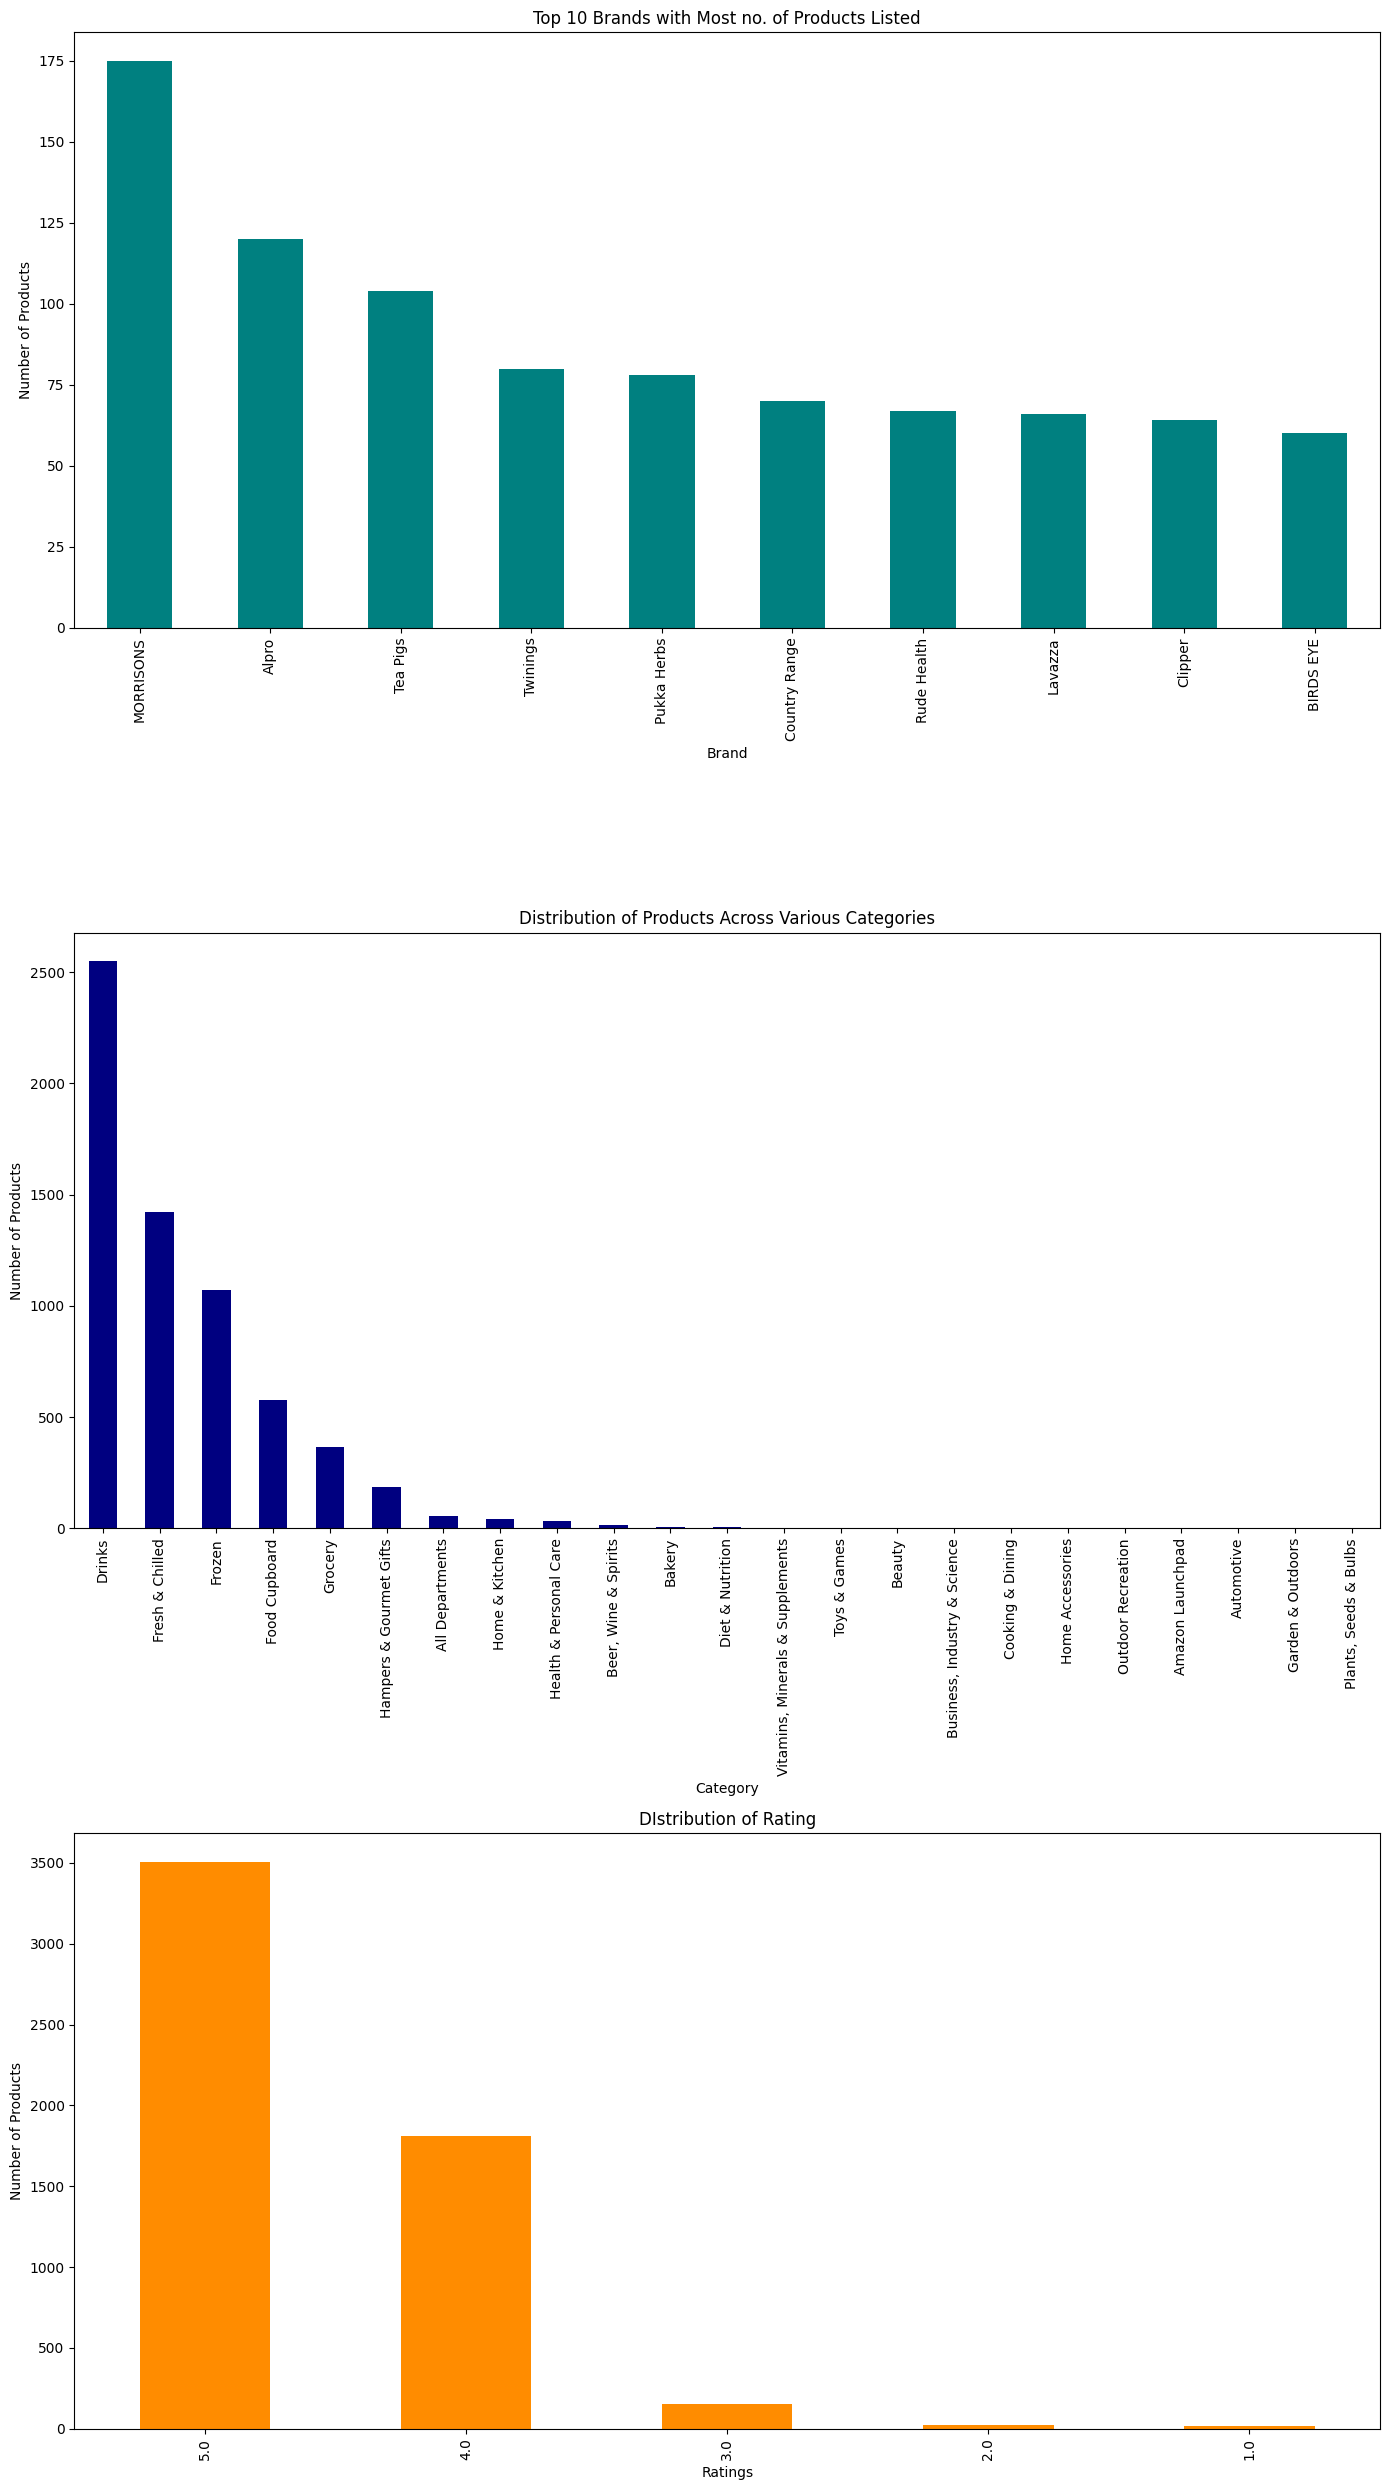

In [6]:
fig, axs = plt.subplots(3, 1, figsize=(14, 25))

# Categorical Data 1: Top 10 Bestselling Brands
top_brands = data['Brand'].value_counts().head(10)
top_brands.plot(kind='bar', ax=axs[0], color='teal')
axs[0].set_title('Top 10 Brands with Most no. of Products Listed')
axs[0].set_ylabel('Number of Products')
axs[0].set_xlabel('Brand')

# Categorical Data 2: Product Categories
category_distribution = data['Category'].value_counts()
category_distribution.plot(kind='bar', ax=axs[1], color='navy')
axs[1].set_title('Distribution of Products Across Various Categories')
axs[1].set_ylabel('Number of Products')
axs[1].set_xlabel('Category')

# Categorical Data 3: Product Rating Distribution
rating_distribution = data['Ratings'].dropna().value_counts().sort_values(ascending = False).head(10)
rating_distribution.plot(kind='bar', ax=axs[2], color='darkorange')
axs[2].set_title('DIstribution of Rating')
axs[2].set_ylabel('Number of Products')
axs[2].set_xlabel('Ratings')

plt.tight_layout()
plt.show()

### Plotting Histgrams for Numerical Data

In [7]:
# List of numeric columns to visualize
numeric_columns = ['Sales', 'Price', 'Revenue', 'Review Count', 'Ratings', 'Images', 'Weight', 'FBA Fees', 'Active Sellers #', 'Review velocity', 'BSR']

# Statistical Summary of numerical columns
data.describe()

,Price,Sales,Revenue,BSR,FBA Fees,Active Sellers #,Ratings,Review Count,Images,Review velocity,Weight
count,5077.000000,4539.000000,4830.000000,5.888000e+03,3705.000000,6290.000000,5513.000000,5513.000000,5849.000000,6291.000000,4904.000000
mean,15.205212,982.762503,11330.371843,9.781002e+04,5.397206,3.617965,4.589516,870.420461,4.666268,21.152917,5.204541
std,12.576685,2430.146523,37115.305071,1.971163e+05,3.521769,7.290586,0.604482,3014.611763,2.913145,249.247799,14.598992
min,0.500000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,-3680.000000,0.010000
25%,7.100000,11.000000,72.000000,5.037000e+03,3.060000,1.000000,4.000000,10.000000,2.000000,0.000000,0.750000
50%,12.840000,91.000000,823.500000,4.037600e+04,4.780000,1.000000,5.000000,93.000000,5.000000,0.000000,1.960000
75%,20.000000,552.000000,5412.500000,1.364030e+05,7.150000,3.000000,5.000000,458.000000,7.000000,5.000000,5.040000
max,254.990000,23288.000000,601965.000000,4.405945e+06,137.000000,135.000000,5.000000,66998.000000,25.000000,9132.000000,881.850000


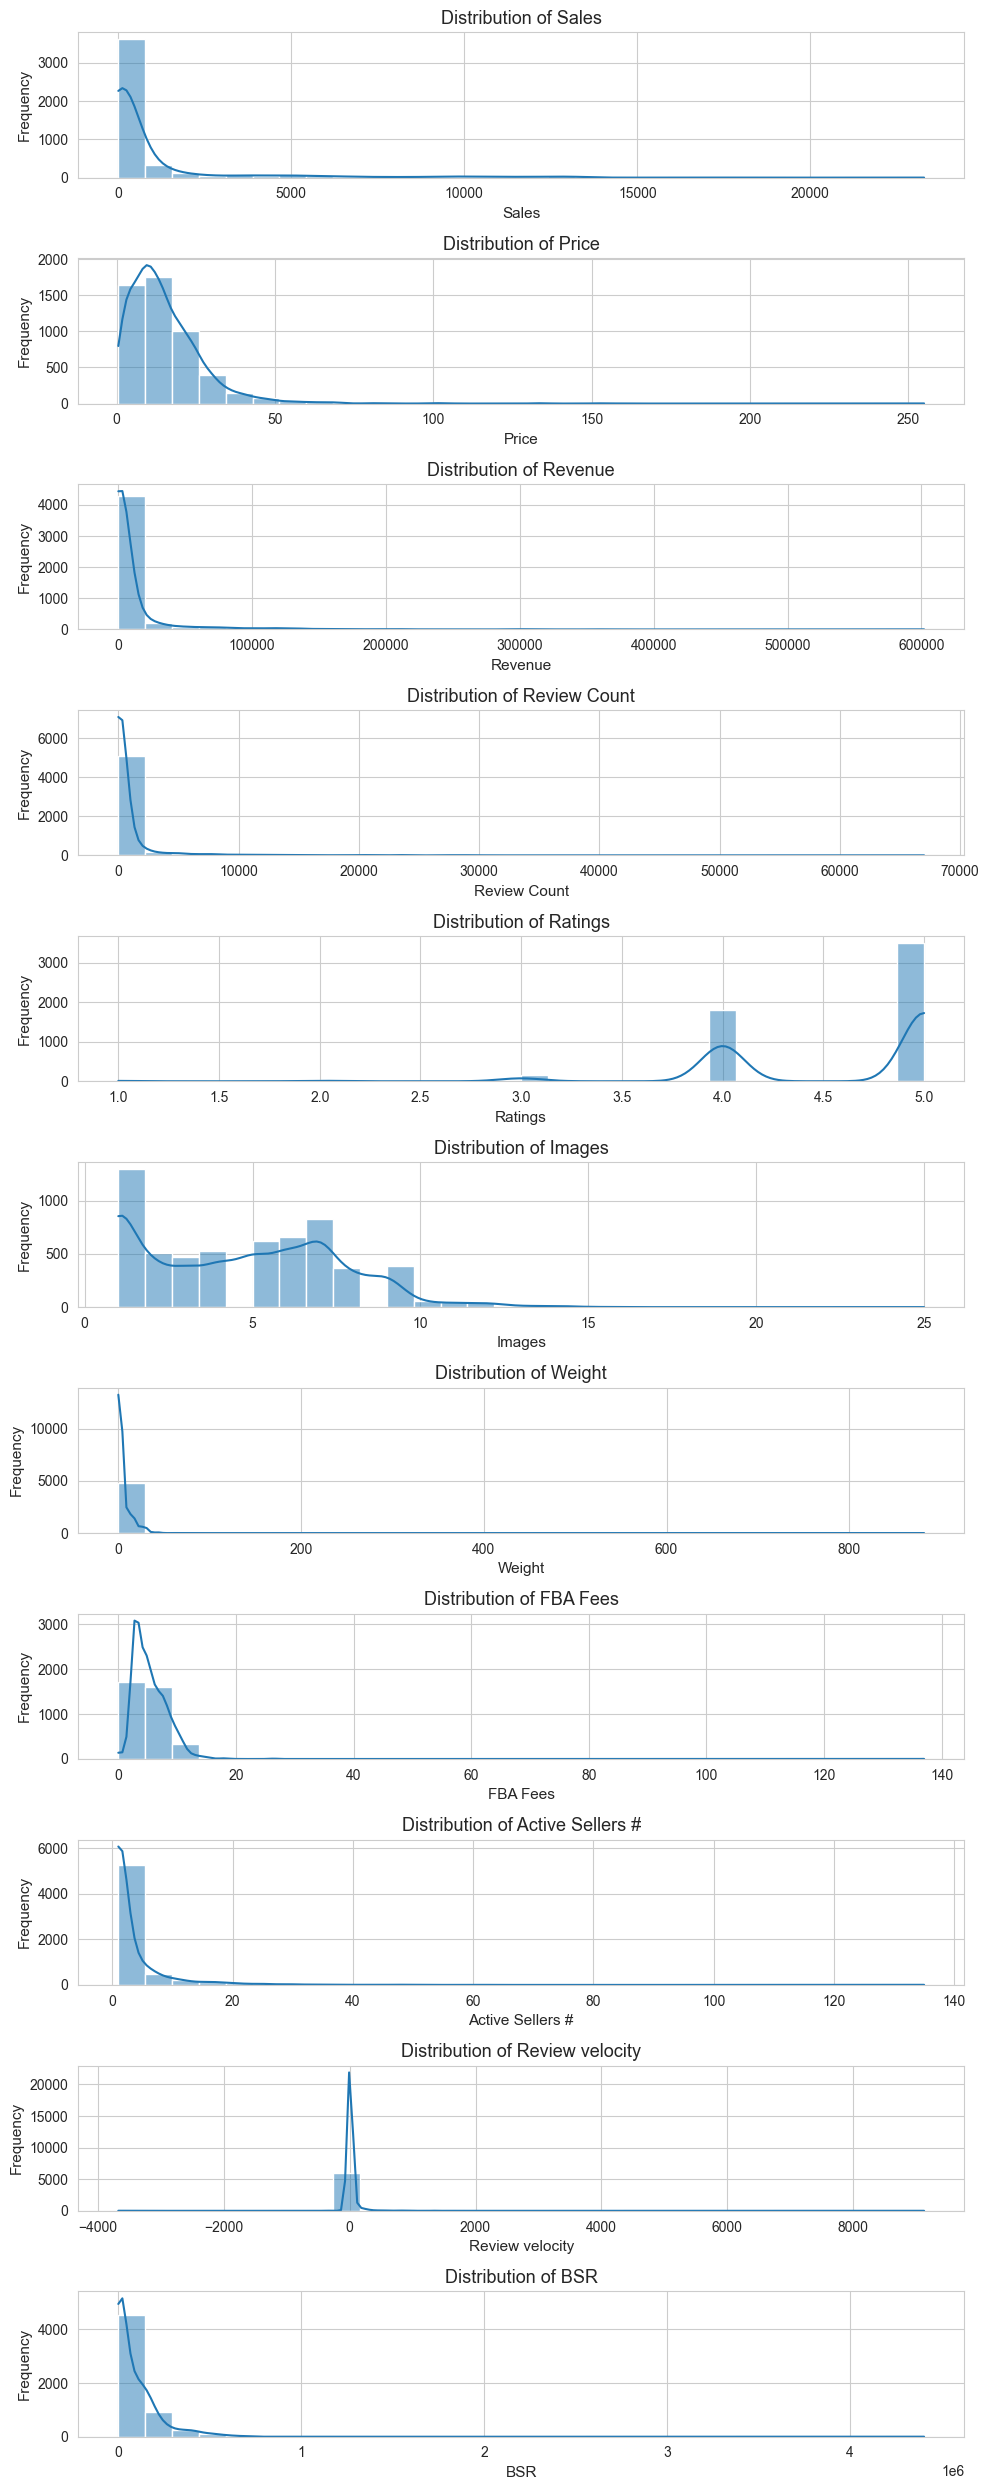

In [8]:
# Plot distributions for the selected columns
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(10, 25))

for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}', fontsize=13)
    axes[i].set_xlabel(col, fontsize=11)
    axes[i].set_ylabel('Frequency', fontsize=11)

plt.tight_layout()
plt.show()

### Plotting Correlation Matrix for all Numeric Datatype Columns

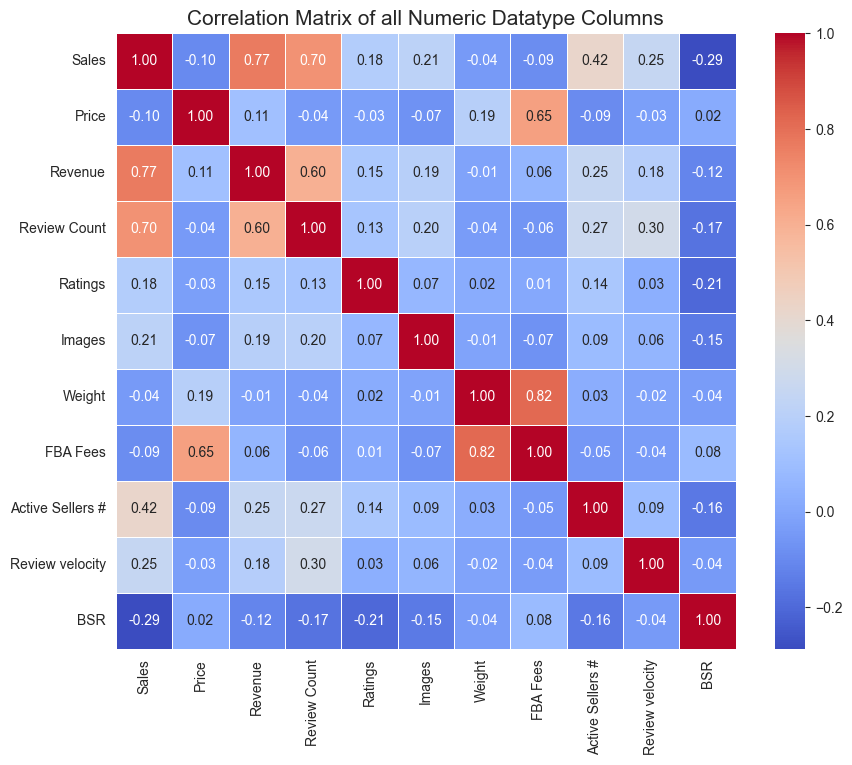

In [9]:
# Generating and Plotting the correlation matrix
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix of all Numeric Datatype Columns", fontsize=15)
plt.show()

### Dropping all Categorical Features and the Numerical Feature with the least correlation with Sales as shown above - BSR

In [10]:
# Drop Unwanted Columns
data1 = data.drop(columns=['ASIN', 'Creation Date', 'Product Details', 'Dimensions', 'Buy Box', 'Brand', 'Delivery', 'Size Tier', 'Category', 'BSR'])
numeric_columns = ['Sales', 'Price', 'Revenue', 'Review Count', 'Ratings', 'Images', 'Weight', 'FBA Fees', 'Active Sellers #', 'Review velocity']

# Remove Missing Values
data2 = data1.dropna()
data2.head()

,Price,Sales,Revenue,FBA Fees,Active Sellers #,Ratings,Review Count,Images,Review velocity,Weight
0,3.50,13466.0,47131.0,2.62,30.0,5.0,44069.0,12.0,868.0,0.51
1,18.28,13338.0,243819.0,8.38,30.0,5.0,40397.0,5.0,830.0,9.77
2,9.99,11194.0,111828.0,3.93,22.0,5.0,3827.0,6.0,235.0,3.73
3,14.87,13492.0,200626.0,5.19,11.0,5.0,28800.0,5.0,466.0,3.26
4,45.00,13377.0,601965.0,11.03,1.0,5.0,27494.0,9.0,223.0,4.74


### Check if any Null or NaN values exist in the dataset before splitting it for model training

In [11]:
# Check if any null values still exist
data2.isnull().sum()


Price               0
Sales               0
Revenue             0
FBA Fees            0
Active Sellers #    0
Ratings             0
Review Count        0
Images              0
Review velocity     0
Weight              0
dtype: int64

In [12]:
# Check if any NaN values still exist
data2.isna().sum()

Price               0
Sales               0
Revenue             0
FBA Fees            0
Active Sellers #    0
Ratings             0
Review Count        0
Images              0
Review velocity     0
Weight              0
dtype: int64

In [13]:
# Check shape of dataframe before generating Train and Test Datasets
data2.shape

(3349, 10)

### Splitting the Dataset into Train and Test Datasets

In [16]:
x1 = data2[['Price', 'Revenue', 'Review Count', 'Ratings', 'Images', 'Weight', 'FBA Fees', 'Active Sellers #', 'Review velocity']]
y = data2['Sales']
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.20, random_state=42)

In [17]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

c:\Users\Omkar\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


KMeans(n_clusters=2, n_init='auto', random_state=0)

<AxesSubplot: xlabel='Ratings', ylabel='Review Count'>

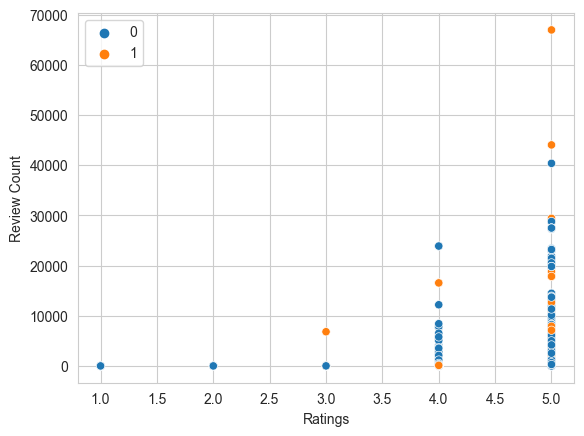

In [37]:
sns.scatterplot(data = X_train, x = 'Ratings', y = 'Review Count', hue = kmeans.labels_)

In [38]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.7515163836846019

In [39]:
K = range(2, 14)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

c:\Users\Omkar\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
c:\Users\Omkar\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
c:\Users\Omkar\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
c:\Users\Omkar\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have 

<AxesSubplot: >

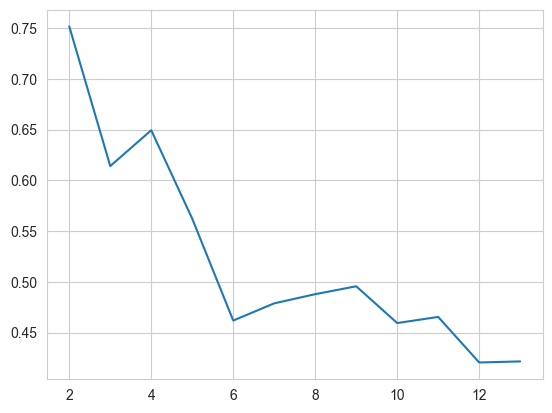

In [40]:
sns.lineplot(x = K, y = score)

The above results indicate that k = 2 gives the highest accuracy. It is also interesting to note that while the accuracy decreases as the k-means cluster increases, it does see a spike in accuracy in intervals.

Overall, the dataset is supposedly low on data entries. Feeding more data might boost the accuracy of the model.